In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

/Users/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Read the data
cars = pd.read_csv("../Data/Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      79 non-null     int64  
 1   MPG     79 non-null     float64
 2   VOL     79 non-null     int64  
 3   SP      79 non-null     float64
 4   WT      79 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.2 KB


In [5]:
#check for missing values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

# Correlation Matrix

In [6]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.726673,0.072230,0.973805,0.071241
MPG,-0.726673,1.000000,-0.519055,-0.689319,-0.516614
VOL,0.072230,-0.519055,1.000000,0.098767,0.999184
SP,0.973805,-0.689319,0.098767,1.000000,0.099045
WT,0.071241,-0.516614,0.999184,0.099045,1.000000


# Scatterplot between variables along with histograms

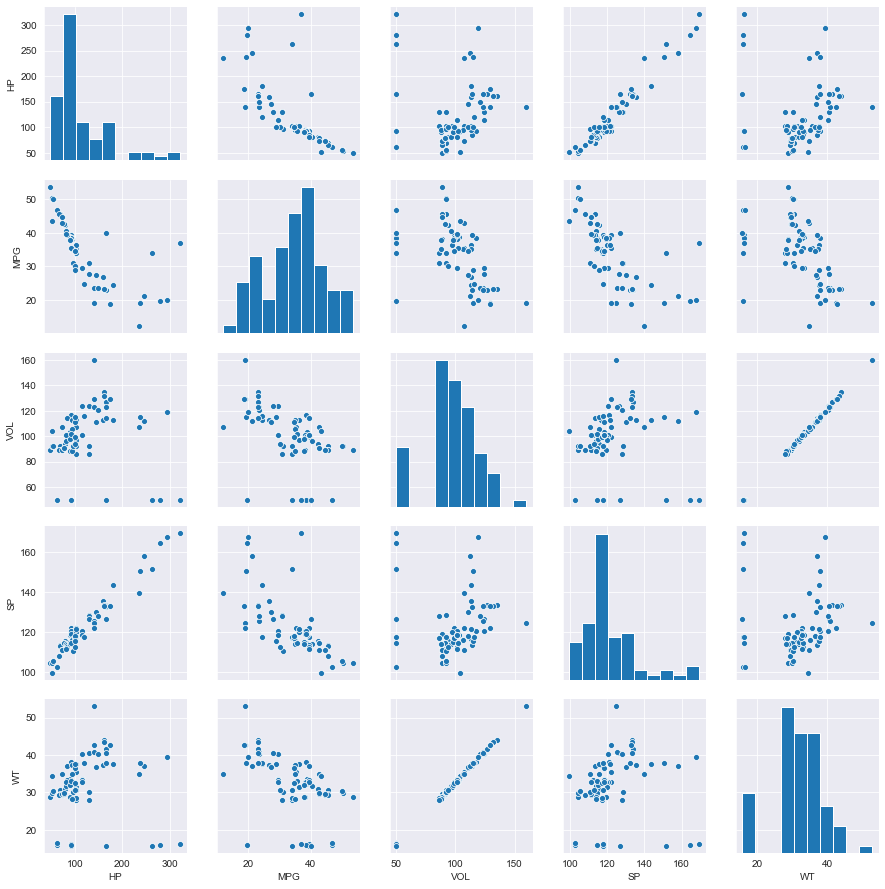

In [7]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(cars)

# Preparing a model

In [4]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [6]:
model.rsquared

0.766783576757218

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     60.83
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           1.19e-22
Time:                        16:44:50   Log-Likelihood:                -229.09
No. Observations:                  79   AIC:                             468.2
Df Residuals:                      74   BIC:                             480.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9626     15.104      2.050      0.044       0.868      61.057
WT             0.4505      1.719      0.262      0.794      -2.975       3.876
VOL           -0.3513      0.577     -0.609      0.545      -1.501       0.799
SP             0.3916      0.161      2.439      0.017       0.072       0.712
HP            -0.2044      0.040     -5.136      0.000      -0.284      -0.125
==============================================================================
Omnibus:                       10.091   Durbin-Watson:                   1.405
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.545
Skew:                           0.699   Prob(JB):                      0.00513
Kurtosis:                       4.118   Cond. No.                     6.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#Coefficients
model.params

Intercept    30.962614
WT            0.450458
VOL          -0.351290
SP            0.391586
HP           -0.204401
dtype: float64

In [10]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept    2.050013
WT           0.261998
VOL         -0.608768
SP           2.438897
HP          -5.136253
dtype: float64 
 Intercept    0.043906
WT           0.794051
VOL          0.544542
SP           0.017130
HP           0.000002
dtype: float64


In [11]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.766783576757218, 0.7541772836089595)

# Simple Linear Regression Models

In [9]:
ml_v=smf.ols('MPG~VOL',data = cars).fit()  
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

Intercept    13.756935
VOL          -5.328735
dtype: float64 
 Intercept    1.928587e-22
VOL          9.538891e-07
dtype: float64


In [10]:
ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     28.40
Date:                Sun, 14 Feb 2021   Prob (F-statistic):           9.54e-07
Time:                        11:30:12   Log-Likelihood:                -274.20
No. Observations:                  79   AIC:                             552.4
Df Residuals:                      77   BIC:                             557.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.5399      4.037     13.757      0.000      47.501      63.579
VOL           -0.2135      0.040     -5.329      0.000      -0.293      -0.134
==============================================================================
Omnibus:                        2.377   Durbin-Watson:                   0.560
Prob(Omnibus):                  0.305   Jarque-Bera (JB):                1.667
Skew:                          -0.263   Prob(JB):                        0.435
Kurtosis:                       3.480   Cond. No.                         459.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
ml_w=smf.ols('MPG~WT',data = cars).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

Intercept    13.894104
WT           -5.294520
dtype: float64 
 Intercept    1.115677e-22
WT           1.094311e-06
dtype: float64


In [12]:
ml_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     28.03
Date:                Sun, 14 Feb 2021   Prob (F-statistic):           1.09e-06
Time:                        11:30:33   Log-Likelihood:                -274.33
No. Observations:                  79   AIC:                             552.7
Df Residuals:                      77   BIC:                             557.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.9603      3.956     13.894      0.000      47.084      62.837
WT            -0.6327      0.120     -5.295      0.000      -0.871      -0.395
==============================================================================
Omnibus:                        2.409   Durbin-Watson:                   0.549
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.698
Skew:                          -0.263   Prob(JB):                        0.428
Kurtosis:                       3.490   Cond. No.                         147.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
ml_wv=smf.ols('MPG~WT+VOL',data = cars).fit()  
print(ml_wv.tvalues, '\n', ml_wv.pvalues)  

Intercept    12.306528
WT            0.510352
VOL          -0.724131
dtype: float64 
 Intercept    9.012937e-20
WT           6.112843e-01
VOL          4.712085e-01
dtype: float64


In [15]:
ml_wv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     14.19
Date:                Sun, 14 Feb 2021   Prob (F-statistic):           5.79e-06
Time:                        11:30:50   Log-Likelihood:                -274.06
No. Observations:                  79   AIC:                             554.1
Df Residuals:                      76   BIC:                             561.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.6502      4.603     12.307      0.000      47.482      65.818
WT             1.5147      2.968      0.510      0.611      -4.396       7.426
VOL           -0.7218      0.997     -0.724      0.471      -2.707       1.263
==============================================================================
Omnibus:                        2.111   Durbin-Watson:                   0.587
Prob(Omnibus):                  0.348   Jarque-Bera (JB):                1.425
Skew:                          -0.251   Prob(JB):                        0.490
Kurtosis:                       3.424   Cond. No.                         588.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Calculating VIF

In [15]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared  
vif_hp = 1/(1-rsq_hp) # 16.33

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) # 564.98

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) #  564.84

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,19.952477
1,WT,625.304367
2,VOL,624.504051
3,SP,20.034836


# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

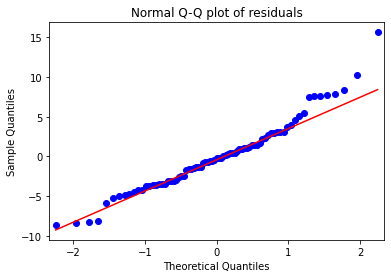

In [8]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [17]:
list(np.where(model.resid>10))

[array([ 0, 74])]

## Residual Plot for Homoscedasticity

In [18]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

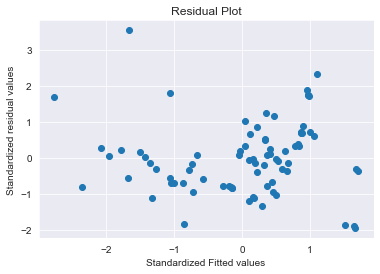

In [19]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

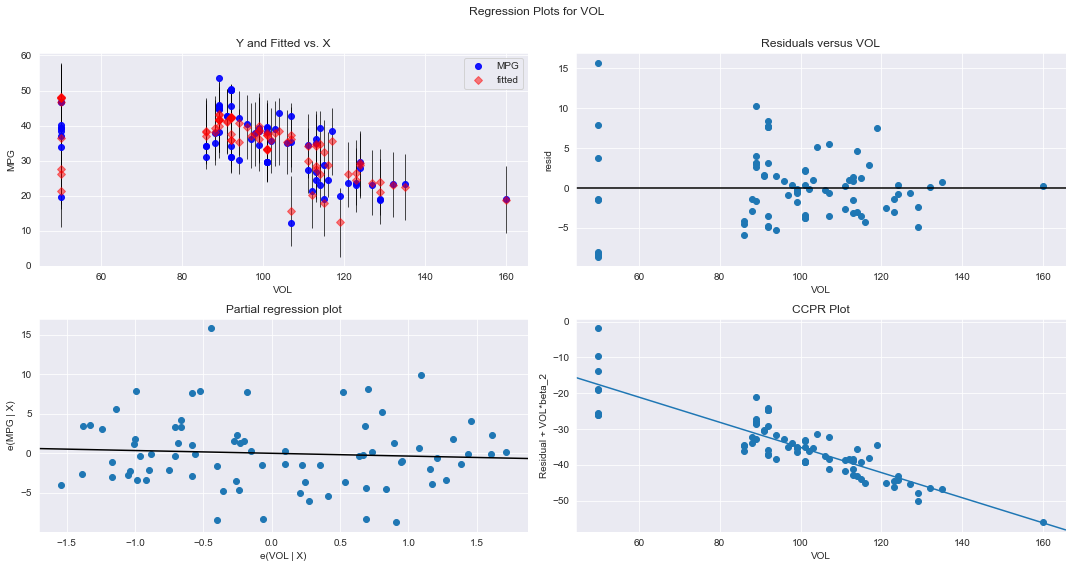

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "VOL", fig=fig)
plt.show()

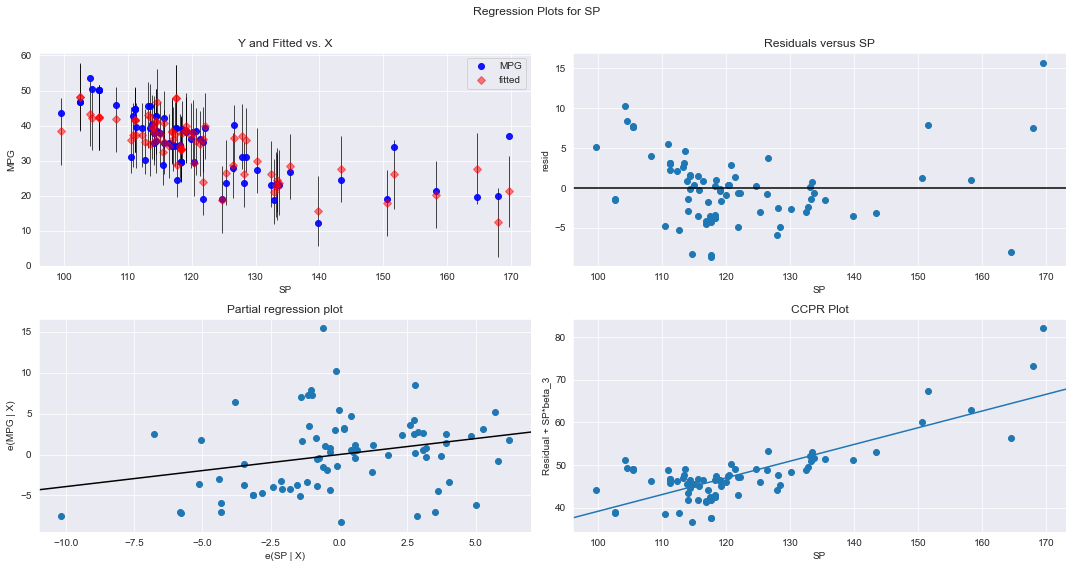

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "SP", fig=fig)
plt.show()

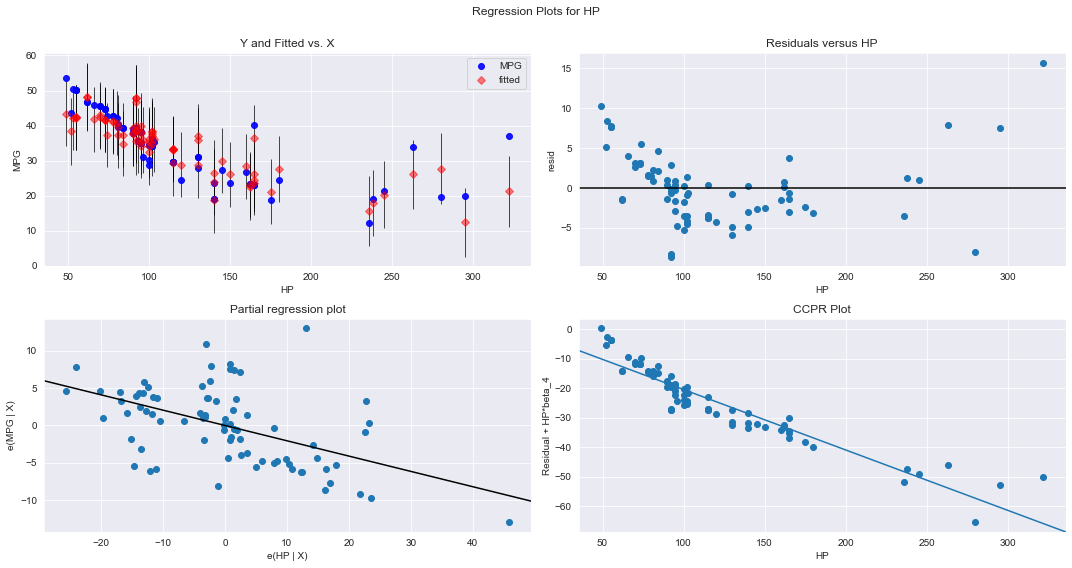

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

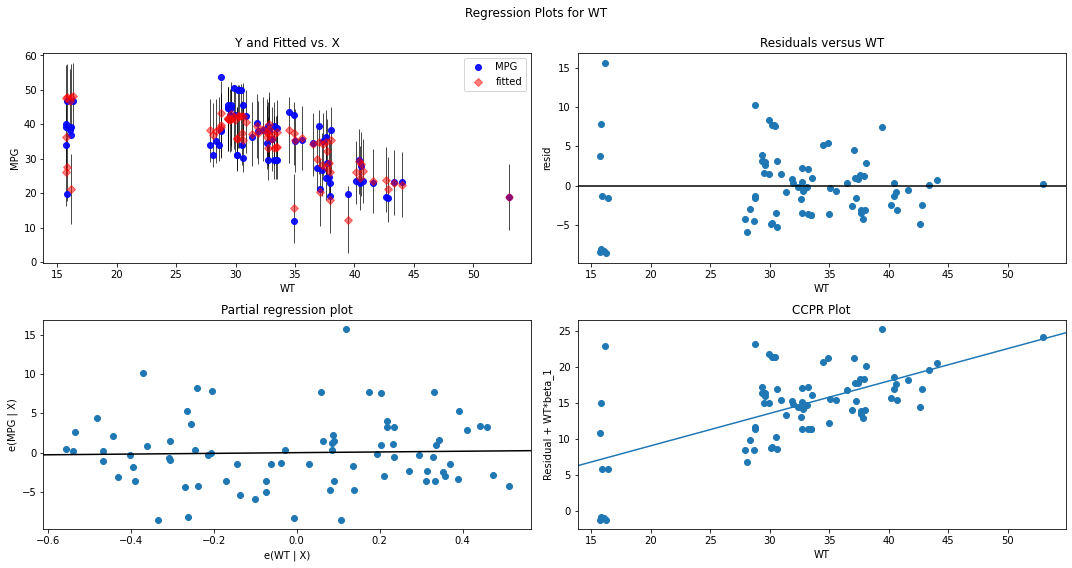

In [9]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "WT", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [9]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

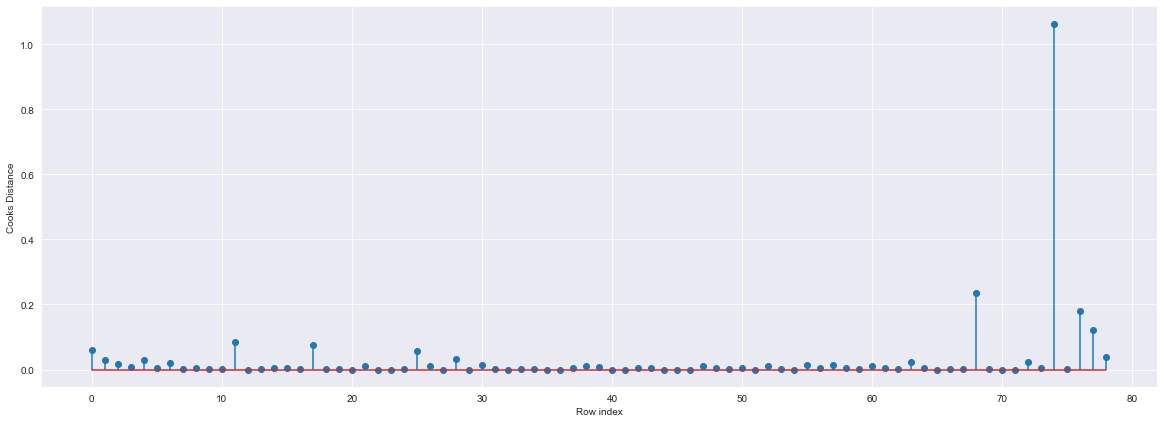

In [24]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

## High Influence points

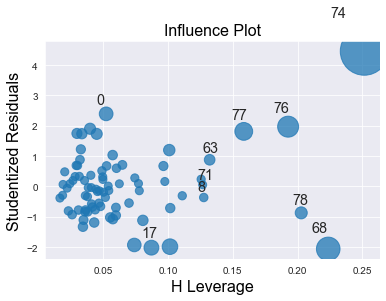

In [25]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [26]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)

#### From the above plot, it is evident that data point 70 and 76 are the influencers

In [27]:
cars[cars.index.isin([70, 76])]

,HP,MPG,VOL,SP,WT
70,162,23.203569,132,133.140074,43.353123
76,263,34.000000,50,151.598513,15.769625


In [28]:
#See the differences in HP and other variable values
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Improving the model

In [12]:
#Load the data
cars_new = pd.read_csv("../Data/Cars.csv")

In [13]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1=cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()

In [14]:
#Drop the original index
car1=car1.drop(['index'],axis=1)

In [15]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,175,18.762837,129,132.864163,42.778219
73,322,36.900000,50,169.598513,16.132947
74,238,19.197888,115,150.576579,37.923113
75,295,19.833733,119,167.944460,39.423099


# Build Model

In [16]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car1).fit()

In [17]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.7734659703067365, 452.7702450971617)

In [18]:
#Exclude variable "VOL" and generate R-Squared and AIC values
final_ml_W= smf.ols('MPG~WT+SP+HP',data = car1).fit()

In [19]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.7722461152048635, 453.1837672957572)

##### Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [20]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

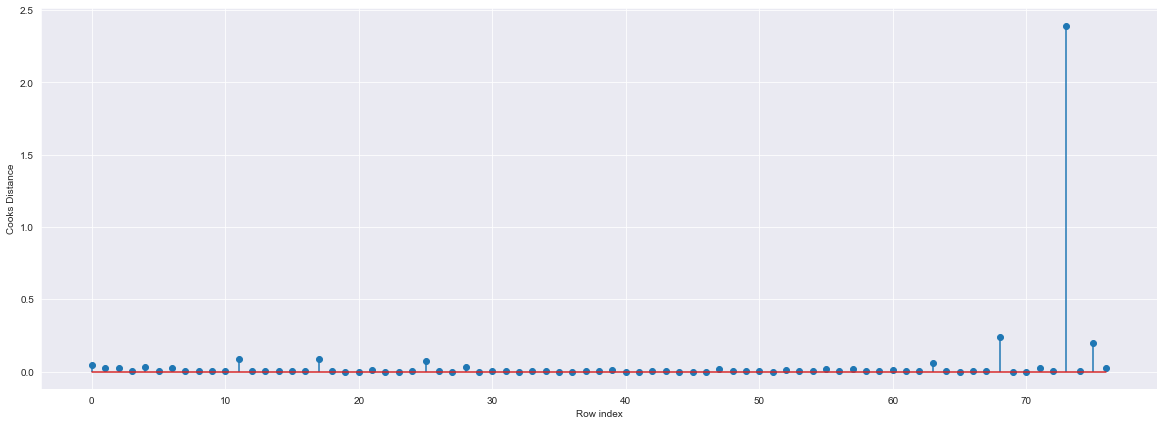

In [41]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [42]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(73, 2.392397186718077)

In [44]:
#Drop 76 and 77 observations
car2=car1.drop(car1.index[[73]],axis=0)

In [45]:
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
71,140,19.086341,129,121.864163,42.618698
72,175,18.762837,129,132.864163,42.778219
74,238,19.197888,115,150.576579,37.923113
75,295,19.833733,119,167.944460,39.423099


In [46]:
#Reset the index and re arrange the row values
car3=car2.reset_index()

In [47]:
car4=car3.drop(['index'],axis=1)

In [48]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
71,140,19.086341,129,121.864163,42.618698
72,175,18.762837,129,132.864163,42.778219
73,238,19.197888,115,150.576579,37.923113
74,295,19.833733,119,167.944460,39.423099


In [49]:
#Build the model on the new data
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [50]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

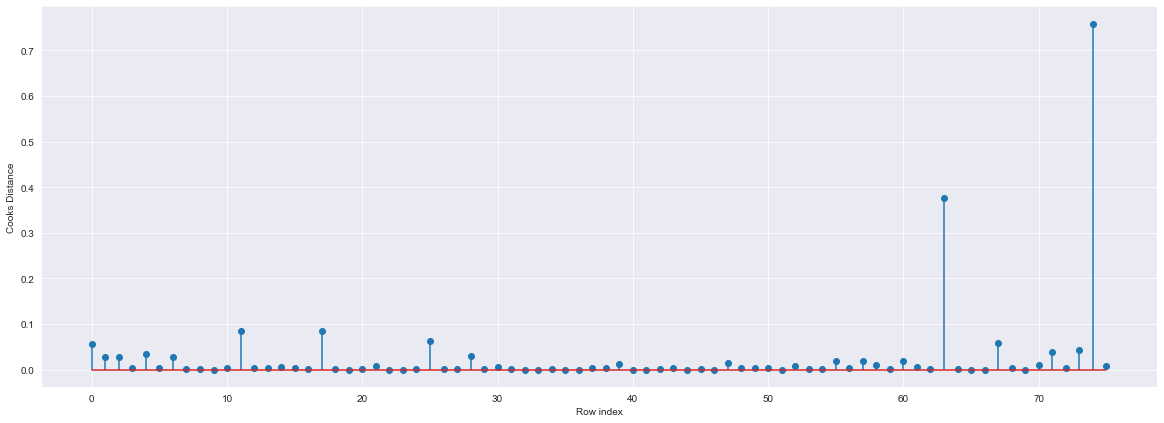

In [51]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [52]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(74, 0.7593256349177965)

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [53]:
#Check the accuracy of the mode
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car4).fit()

In [54]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8425998823763643, 420.2578483898781)

## Predicting for new data

In [55]:
#New data for prediction
new_data=pd.DataFrame({'HP':40,"VOL":95,"SP":102,"WT":35},index=[1])

In [56]:
final_ml_V.predict(new_data) 

1    44.947249
dtype: float64

In [57]:
final_ml_V.predict(cars_new.iloc[0:5,])

0    44.561395
1    43.200367
2    43.200367
3    43.253451
4    43.226115
dtype: float64

In [58]:
pred_y = final_ml_V.predict(cars_new)

In [59]:
pred_y

0     44.561395
1     43.200367
2     43.200367
3     43.253451
4     43.226115
        ...    
74    11.697542
75    14.671158
76    18.119590
77     7.876186
78    11.062745
Length: 79, dtype: float64

In [60]:
final_ml_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     128.5
Date:                Tue, 09 Feb 2021   Prob (F-statistic):           7.78e-29
Time:                        19:16:52   Log-Likelihood:                -206.13
No. Observations:                  76   AIC:                             420.3
Df Residuals:                      72   BIC:                             429.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.8568     12.416      1.519      0.133      -5.893      43.607
VOL           -0.1450      0.022     -6.711      0.000      -0.188      -0.102
SP             0.4924      0.133      3.701      0.000       0.227       0.758
HP            -0.2591      0.034     -7.630      0.000      -0.327      -0.191
==============================================================================
Omnibus:                       12.582   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.256
Skew:                           0.914   Prob(JB):                      0.00132
Kurtosis:                       3.920   Cond. No.                     5.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""